In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from dython import nominal
# import gower

In [128]:
# Cargar datos desde el archivo CSV
archivo = '//content/data_2/CONDUCTORES_AGG.xlsx'
CONDUCTORES_base = pd.read_excel(archivo)
# Cargar datos desde el archivo CSV
archivo2 = '/content/data_2/ACCIDENTES_VF.xlsx'
ACCIDENTES_base = pd.read_excel(archivo2)

In [131]:
# Separa las columnas categóricas y numéricas
columnas_categoricas = CONDUCTORES_base.select_dtypes(include='object').columns.tolist()
columnas_numericas = CONDUCTORES_base.select_dtypes(exclude='object').columns.tolist()

# Cuenta el número de columnas categóricas y numéricas
conteo_categoricas = len(columnas_categoricas)
conteo_numericas = len(columnas_numericas)

# Imprime los resultados
print(f"Número de columnas categóricas: {conteo_categoricas}")
print(f"Número de columnas numéricas: {conteo_numericas}")

Número de columnas categóricas: 21
Número de columnas numéricas: 15


In [132]:
# Separa las columnas categóricas y numéricas
columnas_categoricas_2 = ACCIDENTES_base.select_dtypes(include='object').columns.tolist()
columnas_numericas_2 = ACCIDENTES_base.select_dtypes(exclude='object').columns.tolist()

# Cuenta el número de columnas categóricas y numéricas
conteo_categoricas_2 = len(columnas_categoricas)
conteo_numericas_2 = len(columnas_numericas)

# Imprime los resultados
print(f"Número de columnas categóricas: {conteo_categoricas_2}")
print(f"Número de columnas numéricas: {conteo_numericas_2}")

Número de columnas categóricas: 21
Número de columnas numéricas: 15


In [150]:
data_base = {
    'Base': ['Accidentes', 'Accidentes', 'Conductores', 'Conductores'],
    'Campos': ['Categórica', 'Numérica', 'Categórica', 'Numérica'],
    'Número': [conteo_categoricas_2, conteo_numericas_2, conteo_categoricas, conteo_numericas]
}

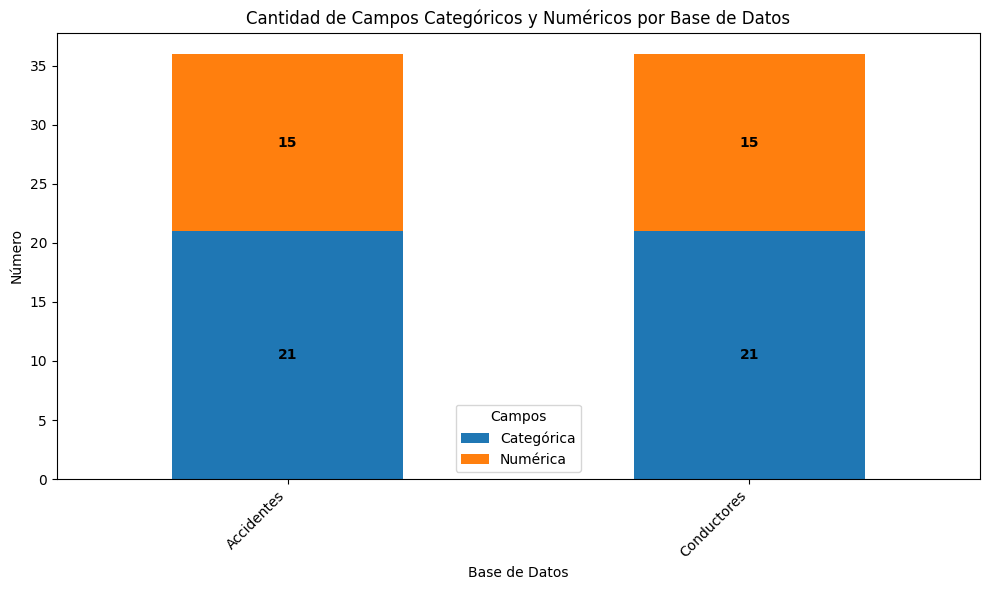

In [153]:

# Pivotar los datos para tener un DataFrame adecuado para una gráfica de barras apilada
df_pivot = df.pivot(index='Base', columns='Campos', values='Número')

# Crear una gráfica de barras apilada
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Base de Datos')
plt.ylabel('Número')
plt.title('Cantidad de Campos Categóricos y Numéricos por Base de Datos')

# Girar etiquetas del eje x en 45 grados
plt.xticks(rotation=45, ha="right")

# Mostrar los valores de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=10, color="black", weight="bold")

# Mostrar el gráfico de barras apilada
plt.tight_layout()
plt.show()

In [148]:
# Crear un DataFrame a partir de los datos
df = pd.DataFrame(data_base)

# Pivotar los datos para tener un DataFrame adecuado para una gráfica de barras apilada
df_pivot = df.pivot(index='Base', columns='Campos', values='Número')

# Crear una gráfica de barras apilada
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Base de Datos')
plt.ylabel('Número')
plt.title('Cantidad de Campos Categóricos y Numéricos por Base de Datos')

# Mostrar el gráfico de barras apilada
plt.tight_layout()
plt.show()

KeyError: ignored

In [149]:
df

,Mes,Producto,Ventas
0,Accidentes,Categórica,21
1,Accidentes,Numérica,15
2,Conductores,Categórica,21
3,Conductores,Numérica,15


In [143]:
# Crear un DataFrame a partir de los datos
df = pd.DataFrame(data_base)

# Pivotar los datos para tener un DataFrame adecuado para una gráfica de barras apilada
df_pivot = df.pivot(index='Base', columns='Campos', values='Número')

# Crear una gráfica de barras apilada
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Base de Datos')
plt.ylabel('Número')
plt.title('Cantidad de Campos Categóricos y Numéricos por Base de Datos')

# Mostrar el gráfico de barras apilada
plt.tight_layout()
plt.show()

KeyError: ignored

In [23]:
# # Calcula la mitad del número total de registros
# mitad_de_registros = len(CONDUCTORES_base) // 2

# # Establece una semilla para la reproducibilidad (opcional)
# semilla = 42  # Puedes elegir cualquier número como semilla

# # Genera una muestra aleatoria de la mitad de los registros utilizando la semilla
# muestra_aleatoria = CONDUCTORES_base.sample(n=mitad_de_registros, random_state=semilla)

# # Guarda la muestra aleatoria en un nuevo DataFrame o archivo
# # Por ejemplo, puedes guardarla en un nuevo DataFrame llamado "muestra_almacenada"
# muestra_almacenada = muestra_aleatoria.copy()
# muestra_almacenada.shape

In [80]:

data = CONDUCTORES_base.copy()

# Quedarnos solo con las columnas que tienen que ver con la gravedad del accidente o una caracterizacion de este.
data = data[['IdConductor', 'PortaLicencia', 'CON_BICICLETA', 'CON_CARGA',
       'CON_EMBRIAGUEZ', 'CON_HUECOS', 'CON_MENORES', 'CON_MOTO', 'CON_PEATON',
       'CON_PERSONA_MAYOR', 'CON_RUTAS', 'CON_TPI', 'CON_VELOCIDAD', 'HuboFallaVehiculo',
       'CumpleNormasSeguridad', 'CantidadVictimas', 'Cantidad_HERIDO_VALORADO',
       'Cantidad_HERIDO_HOSPITALIZADO', 'Cantidad_MUERTA', 'Cantidad_PEATON', 'GravedadAccidente']]

# Volver la columna IdConductor el indice.
data = data.set_index('IdConductor')

# Codificación de variables categóricas
data = pd.get_dummies(data, columns=['PortaLicencia', 'CON_BICICLETA', 'CON_CARGA',
       'CON_EMBRIAGUEZ', 'CON_HUECOS', 'CON_MENORES', 'CON_MOTO', 'CON_PEATON',
       'CON_PERSONA_MAYOR', 'CON_RUTAS', 'CON_TPI', 'CON_VELOCIDAD'],drop_first=True).astype(int)

data

,HuboFallaVehiculo,CumpleNormasSeguridad,CantidadVictimas,Cantidad_HERIDO_VALORADO,Cantidad_HERIDO_HOSPITALIZADO,Cantidad_MUERTA,Cantidad_PEATON,GravedadAccidente,PortaLicencia_S,PortaLicencia_SIN INFORMACION,...,CON_CARGA_SI,CON_EMBRIAGUEZ_SI,CON_HUECOS_SI,CON_MENORES_SI,CON_MOTO_SI,CON_PEATON_SI,CON_PERSONA_MAYOR_SI,CON_RUTAS_SI,CON_TPI_SI,CON_VELOCIDAD_SI
IdConductor,,,,,,,,,,,,,,,,,,,,,
1-1,0,0,1,1,0,0,1,2,0,1,...,0,0,0,0,0,1,1,0,0,0
2-1,0,-1,0,0,0,0,0,3,1,0,...,0,0,0,0,1,0,1,0,0,0
2-2,0,0,0,0,0,0,0,3,0,1,...,0,0,0,0,1,0,1,0,0,0
3-2,0,-1,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3-1,0,-1,0,0,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34988-2,0,1,0,0,0,0,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
34988-1,0,1,0,0,0,0,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
34989-2,0,1,0,0,0,0,0,3,1,0,...,1,0,0,0,0,0,0,0,0,0


In [100]:
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 11): # Evaluamos entre 1 a 11 clusters posibles
    kmeans = KMeans(n_clusters = k, n_init=10).fit(data)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(data, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)

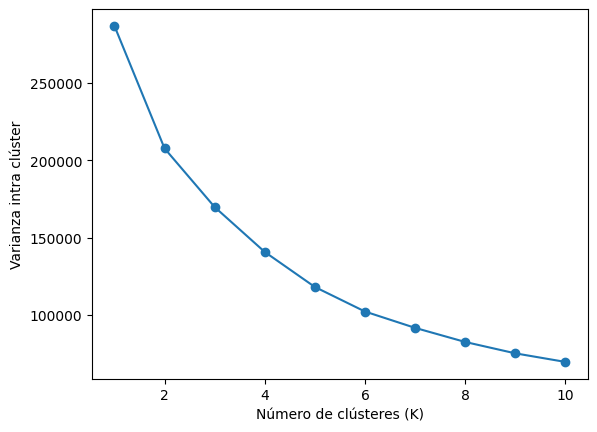

In [101]:
plt.plot(range(1, 11), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

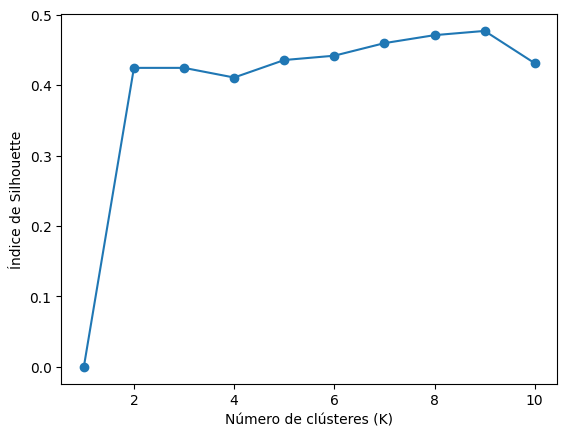

In [102]:
plt.plot(range(1, 11), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

In [84]:
# data.dtypes
scaler = StandardScaler()
data_estandarizada = scaler.fit_transform(data)
data_estandarizada

array([[-0.05918412, -0.64752584,  0.91853298, ..., -0.01781634,
        -0.50333158, -0.07709302],
       [-0.05918412, -1.88104951, -0.24573497, ..., -0.01781634,
        -0.50333158, -0.07709302],
       [-0.05918412, -0.64752584, -0.24573497, ..., -0.01781634,
        -0.50333158, -0.07709302],
       ...,
       [-0.05918412,  0.58599784, -0.24573497, ..., -0.01781634,
        -0.50333158, -0.07709302],
       [-0.05918412,  0.58599784, -0.24573497, ..., -0.01781634,
        -0.50333158, -0.07709302],
       [-0.05918412,  0.58599784,  0.91853298, ..., -0.01781634,
        -0.50333158, -0.07709302]])

In [85]:
# df_estandarizado = pd.DataFrame(data_estandarizada)
# df_estandarizado

In [86]:
# pca = PCA(n_components=0.90)
# reduced_data = pca.fit_transform(df_estandarizado)

# # Número de componentes seleccionados
# n_components = pca.n_components_

# print(f"Número de componentes seleccionados: {n_components}")
# print(f"Varianza explicada por los componentes seleccionados: {pca.explained_variance_ratio_.sum()}")

In [87]:
# Crear el modelo KMeans
kmeans = KMeans(n_clusters=5, n_init=10)

# Entrenar el modelo
kmeans.fit(data_estandarizada)

# Agregar las etiquetas asignadas por KMeans al DataFrame
CONDUCTORES_base["Cluster_Kmeans"] = kmeans.labels_
data["Cluster_Kmeans"] = kmeans.labels_
# Mostrar el DataFrame con las etiquetas de los clusters
CONDUCTORES_base.head()

,Unnamed: 0,IdConductor,Sexo,PortaLicencia,CodigoCategoriaLicencia,CodigoRestriccionLicencia,ModeloVehiculo,CapacidadCarga,CantidadPasajeros,ClaseVehiculo,...,CumpleNormasSeguridad,CantidadVictimas,Cantidad_HERIDO_VALORADO,Cantidad_HERIDO_HOSPITALIZADO,Cantidad_MUERTA,Cantidad_PEATON,Cantidad_ACOMPANANTE,Cantidad_PASAJERO,GravedadAccidente,Cluster_Kmeans
0,0,1-1,NO APLICA,SIN INFORMACION,SIN INFORMACION,SIN INFORMACION,2011,0.0,0,SIN INFORMACION,...,0,1,1,0,0,1,0,0,2,2
1,1,2-1,MASCULINO,S,A2,NINGUNA,2017,0.0,2,Motocicleta,...,-1,0,0,0,0,0,0,0,3,3
2,2,2-2,NO APLICA,SIN INFORMACION,SIN INFORMACION,SIN INFORMACION,2011,0.0,0,SIN INFORMACION,...,0,0,0,0,0,0,0,0,3,0
3,3,3-2,MASCULINO,N,SIN INFORMACION,SIN INFORMACION,2011,0.0,0,Bicicleta,...,-1,0,0,0,0,0,0,0,2,0
4,4,3-1,MASCULINO,S,C3,NINGUNA,2014,0.0,53,Bus,...,-1,0,0,0,0,0,0,0,2,0


In [88]:
CONDUCTORES_base['Cluster_Kmeans'].value_counts()

1    39241
3    16281
0     6215
2     4080
4      362
Name: Cluster_Kmeans, dtype: int64

<Figure size 800x600 with 0 Axes>

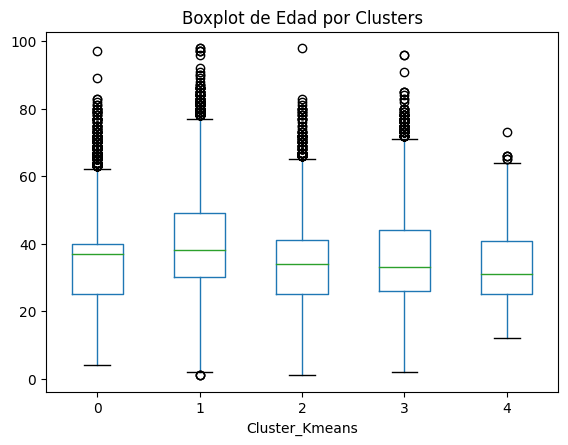

<Figure size 800x600 with 0 Axes>

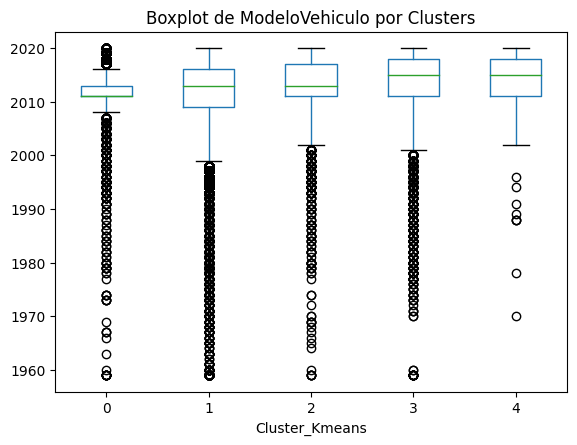

<Figure size 800x600 with 0 Axes>

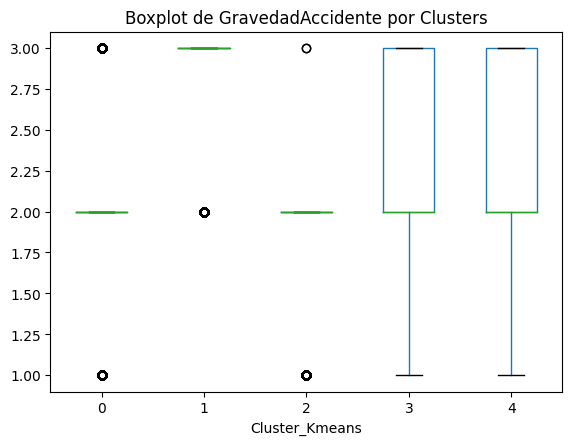

<Figure size 800x600 with 0 Axes>

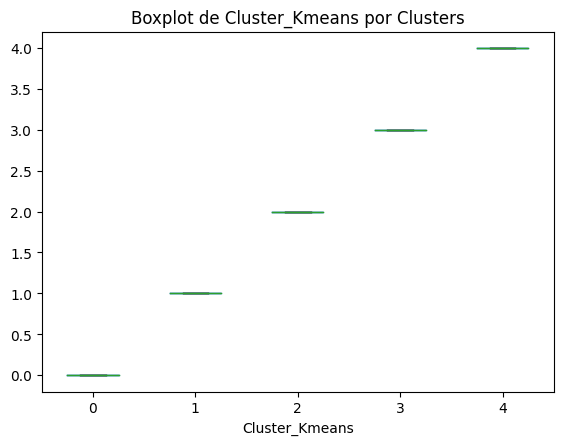

Descripción de Sexo por Clusters (suma):
Sexo            FEMENINO  MASCULINO  NO APLICA
Cluster_Kmeans                                
0                    704       4269       1242
1                   4713      34528          0
2                    251       3380        449
3                   1675      14606          0
4                     58        298          6
Descripción de CodigoCategoriaLicencia por Clusters (suma):
CodigoCategoriaLicencia  01   02   03  04  05  06  A1    A2     B1    B2  \
Cluster_Kmeans                                                             
0                         4   18   12   3   2   1   6   509    492   213   
1                        51   29  466  32  38   2  32    60  15610  5121   
2                         1   58   14   3   2   0  11  1318    554   206   
3                        16  307   98   7  10   1  63  6773   3240  1068   
4                         0    5    0   0   0   0   1   159     68    13   

CodigoCategoriaLicencia    C1     C2 

In [89]:

# Columnas de interés
columnas_interes = ['Edad', 'Sexo', 'ModeloVehiculo', 'CodigoCategoriaLicencia',
                    'CodigoRestriccionLicencia', 'VehiculoViajabaClasificado',
                    'GravedadAccidente', 'Cluster_Kmeans']

# Filtra las columnas de interés en el DataFrame
df_interes = CONDUCTORES_base[columnas_interes]

# Identifica las columnas numéricas y categóricas
columnas_numericas = df_interes.select_dtypes(include='number').columns.tolist()
columnas_categoricas = df_interes.select_dtypes(exclude='number').columns.tolist()

# Descripción de columnas numéricas por cluster (boxplot)
for columna in columnas_numericas:
    plt.figure(figsize=(8, 6))
    df_interes.boxplot(column=columna, by='Cluster_Kmeans', grid=False)
    plt.title(f'Boxplot de {columna} por Clusters')
    plt.suptitle('')  # Elimina el título automático de la figura
    plt.show()

# Descripción de columnas categóricas por cluster (suma)
for columna in columnas_categoricas:
    descripcion = df_interes.groupby(['Cluster_Kmeans', columna]).size().unstack(fill_value=0)
    print(f"Descripción de {columna} por Clusters (suma):")
    print(descripcion)

In [33]:
# Obtiene la lista de valores únicos en la columna "Cluster"
valores_unicos_cluster = CONDUCTORES_base['Cluster_Kmeans'].unique()
# Crea un diccionario para almacenar los resultados
resultados_describe = {}

# Itera a través de los valores únicos en la columna "Cluster"
for valor_cluster in valores_unicos_cluster:
    # Filtra el DataFrame para el valor de "Cluster" actual
    df_filtrado = CONDUCTORES_base[CONDUCTORES_base['Cluster_Kmeans'] == valor_cluster]

# Aplica describe() al DataFrame filtrado y almacena los resultados en el diccionario
resultados_describe[valor_cluster] = df_filtrado.drop(columns=['Cluster_Kmeans']).describe(include='all')[['Edad','Sexo','ModeloVehiculo','CodigoCategoriaLicencia', 'CodigoRestriccionLicencia', 'VehiculoViajabaClasificado', 'GravedadAccidente']]

# Puedes acceder a los resultados para cada valor de "Cluster" a través del diccionario
for valor_cluster, descripcion in resultados_describe.items():
    print(f"Resumen estadístico para Cluster {valor_cluster}:\n{descripcion}\n")

Resumen estadístico para Cluster 1:
                Edad       Sexo  ModeloVehiculo CodigoCategoriaLicencia  \
count   10546.000000      10546    10546.000000                   10546   
unique           NaN          2             NaN                      14   
top              NaN  MASCULINO             NaN                      C2   
freq             NaN       9815             NaN                    3694   
mean       40.069505        NaN     2012.227100                     NaN   
std        13.194615        NaN        6.060522                     NaN   
min         1.000000        NaN     1959.000000                     NaN   
25%        29.000000        NaN     2009.000000                     NaN   
50%        38.000000        NaN     2013.000000                     NaN   
75%        50.000000        NaN     2016.000000                     NaN   
max        98.000000        NaN     2020.000000                     NaN   

       CodigoRestriccionLicencia VehiculoViajabaClasificado  Gr

In [13]:
# Obtiene la lista de valores únicos en la columna "Cluster"
valores_unicos_cluster = CONDUCTORES_base['Cluster_Kmeans'].unique()

# Crea un diccionario para almacenar los resultados
resultados_describe = {}

# Itera a través de los valores únicos en la columna "Cluster"
for valor_cluster in valores_unicos_cluster:
    # Filtra el DataFrame para el valor de "Cluster" actual
    df_filtrado = data[CONDUCTORES_base['Cluster_Kmeans'] == valor_cluster]

    # Aplica describe() al DataFrame filtrado y almacena los resultados en el diccionario
    resultados_describe[valor_cluster] = df_filtrado.drop(columns=['Cluster_Kmeans']).describe()

# Puedes acceder a los resultados para cada valor de "Cluster" a través del diccionario
for valor_cluster, descripcion in resultados_describe.items():
    print(f"Resumen estadístico para Cluster {valor_cluster}:\n{descripcion}\n")

Resumen estadístico para Cluster 1:
       HuboFallaVehiculo  CumpleNormasSeguridad  CantidadVictimas  \
count        4043.000000            4043.000000       4043.000000   
mean            0.005194               0.403413          1.443235   
std             0.071892               0.791317          2.687580   
min             0.000000              -1.000000          1.000000   
25%             0.000000               0.000000          1.000000   
50%             0.000000               1.000000          1.000000   
75%             0.000000               1.000000          1.000000   
max             1.000000               1.000000         64.000000   

       Cantidad_HERIDO_VALORADO  Cantidad_HERIDO_HOSPITALIZADO  \
count               4043.000000                    4043.000000   
mean                   1.264160                       0.114024   
std                    2.707307                       0.327086   
min                    0.000000                       0.000000   
25%         

In [90]:
resultados = data.groupby('Cluster_Kmeans').sum()
resultados

,HuboFallaVehiculo,CumpleNormasSeguridad,CantidadVictimas,Cantidad_HERIDO_VALORADO,Cantidad_HERIDO_HOSPITALIZADO,Cantidad_MUERTA,Cantidad_PEATON,GravedadAccidente,PortaLicencia_S,PortaLicencia_SIN INFORMACION,...,CON_CARGA_SI,CON_EMBRIAGUEZ_SI,CON_HUECOS_SI,CON_MENORES_SI,CON_MOTO_SI,CON_PEATON_SI,CON_PERSONA_MAYOR_SI,CON_RUTAS_SI,CON_TPI_SI,CON_VELOCIDAD_SI
Cluster_Kmeans,,,,,,,,,,,,,,,,,,,,,
0,10,1734,1085,1026,50,9,0,13602,2246,1242,...,383,191,0,650,1480,2,2198,0,819,76
1,148,23768,89,89,0,0,0,117255,38843,0,...,8402,496,0,174,32,0,7068,0,9091,81
2,21,1643,6039,5299,477,263,4275,7887,3286,449,...,156,41,0,525,1630,3940,1754,15,377,72
3,52,7436,6636,6335,229,72,0,37080,15844,0,...,921,397,0,567,13762,0,2524,6,3049,159
4,0,159,119,111,7,1,1,833,334,6,...,21,2,362,11,220,1,40,0,41,3


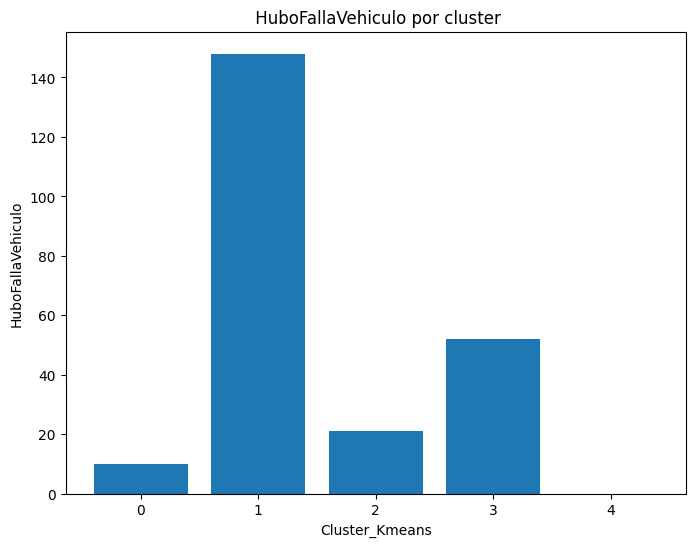

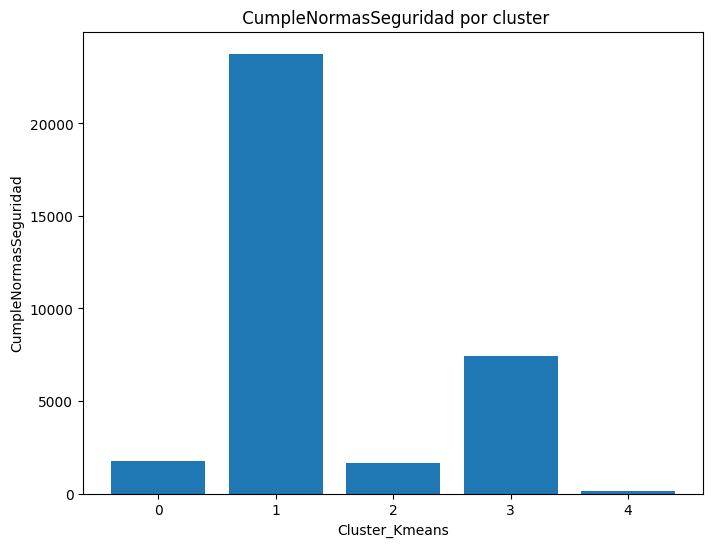

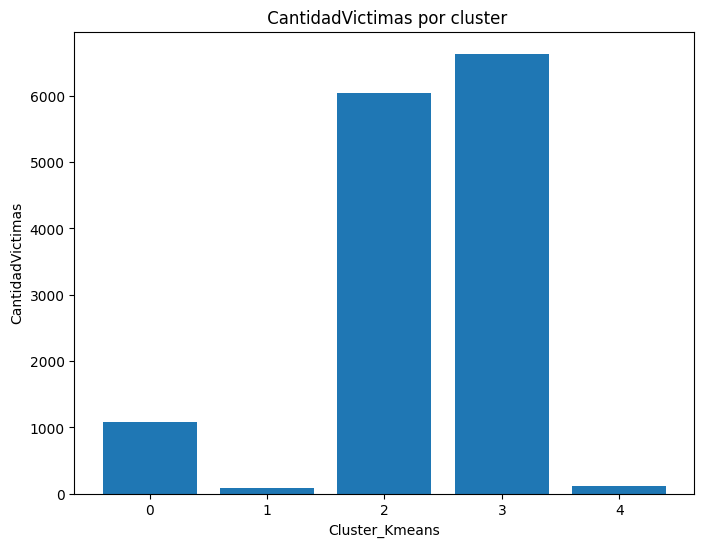

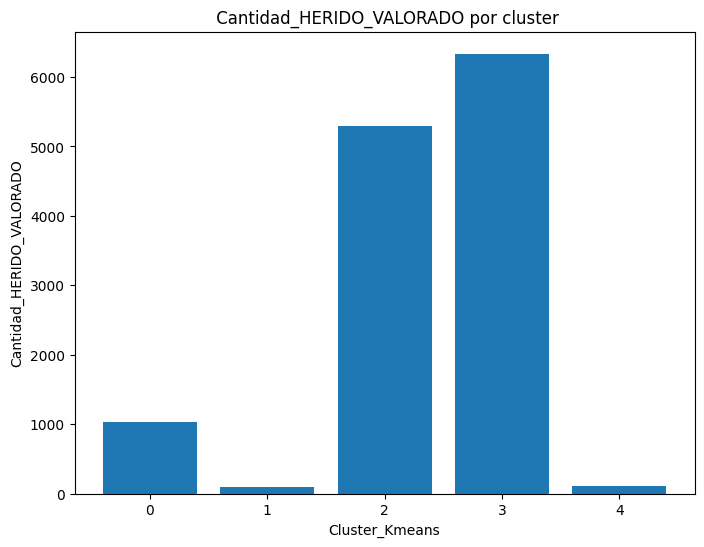

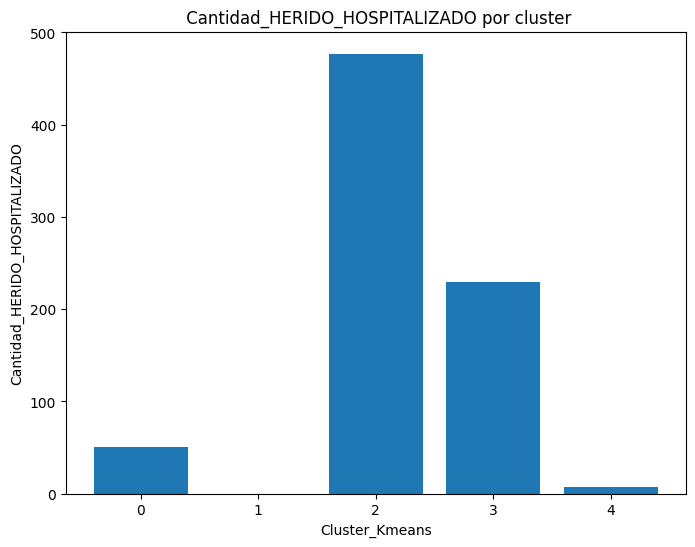

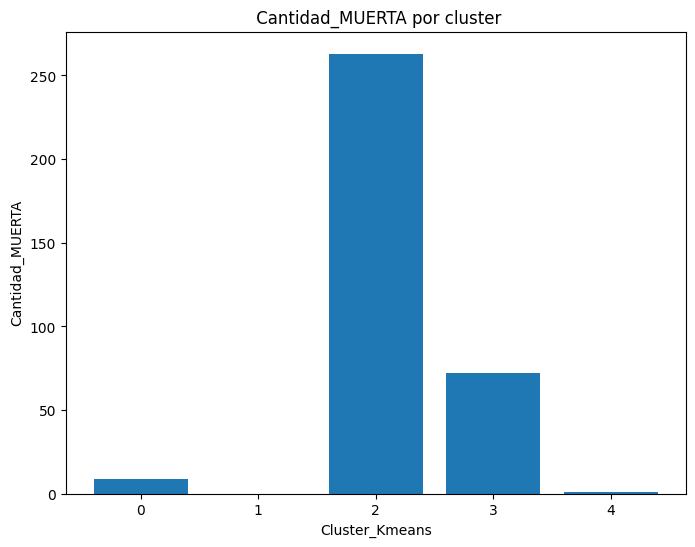

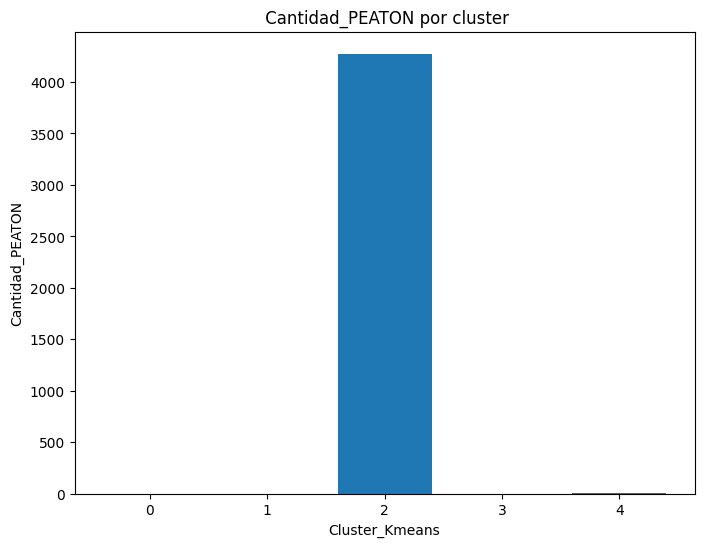

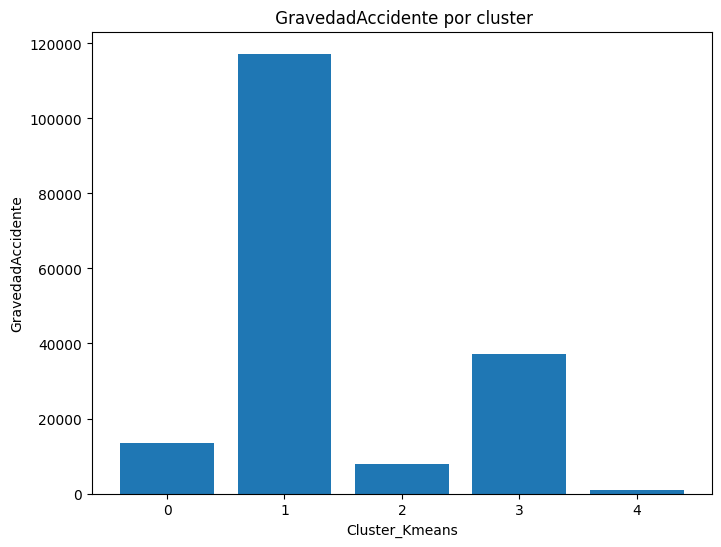

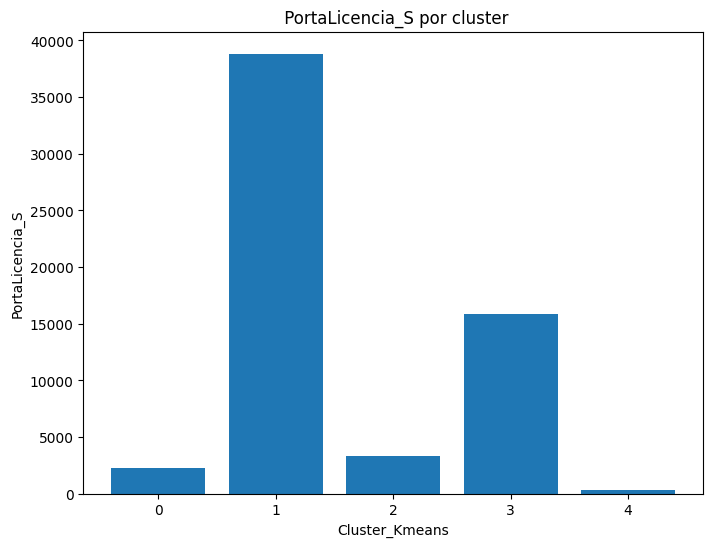

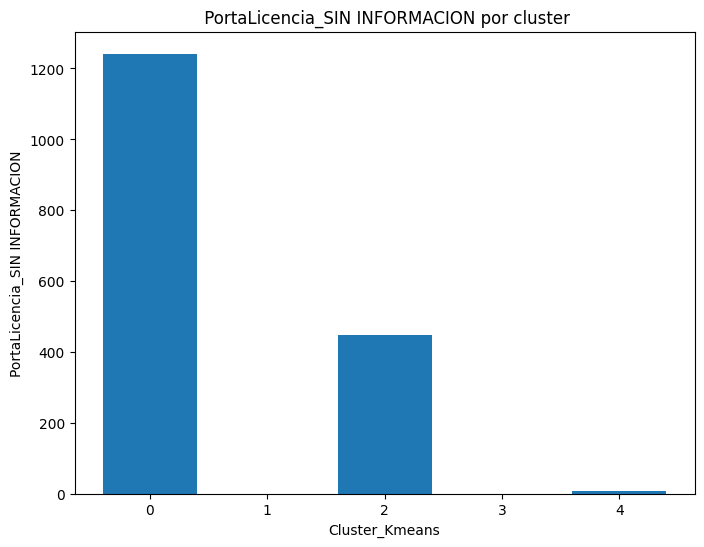

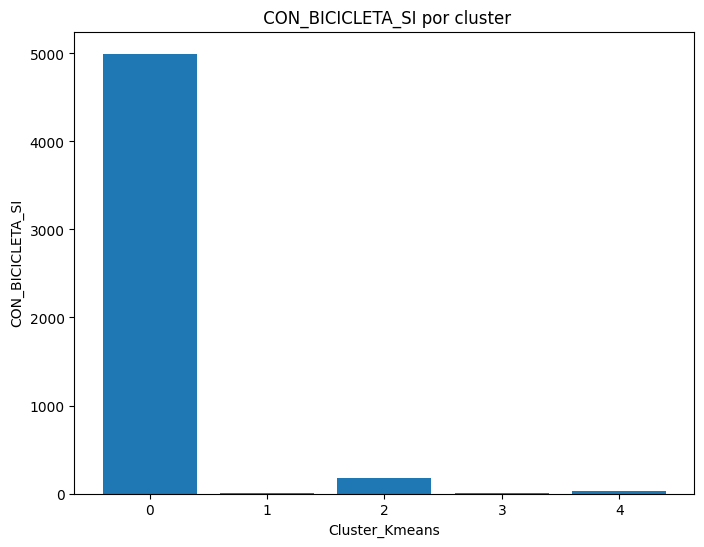

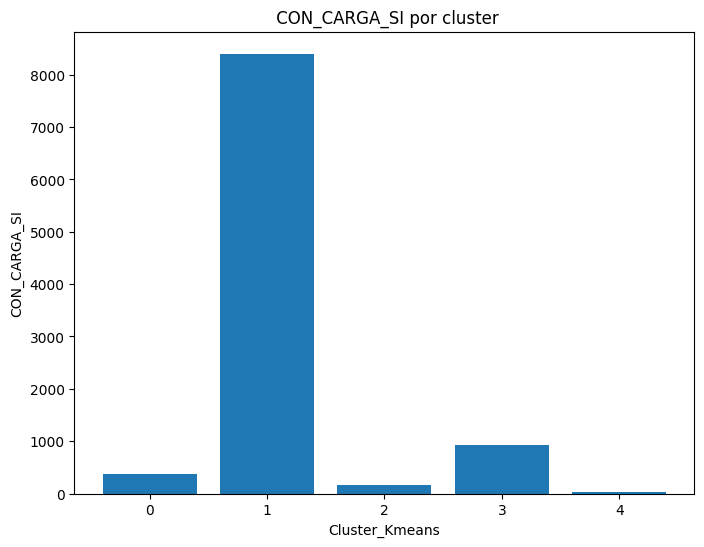

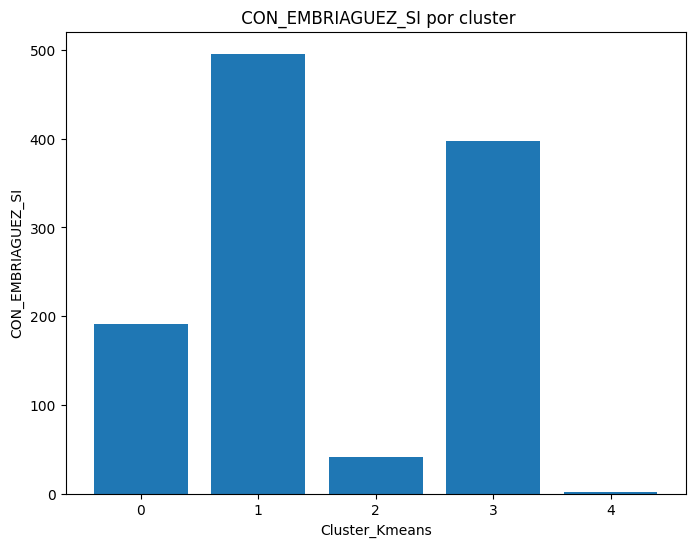

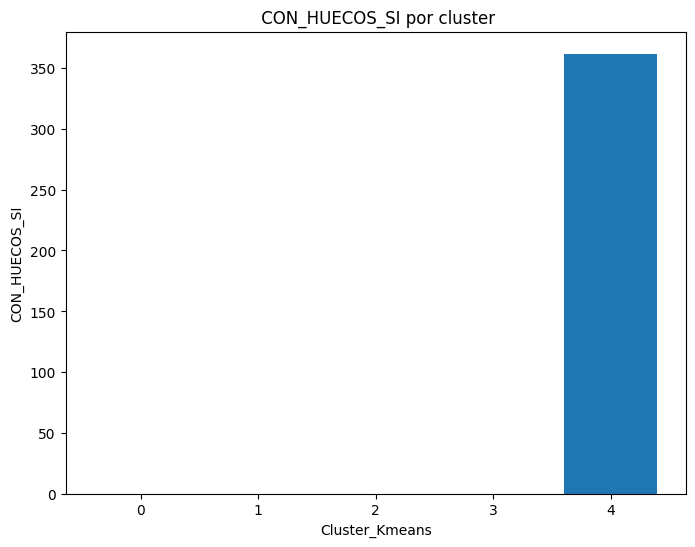

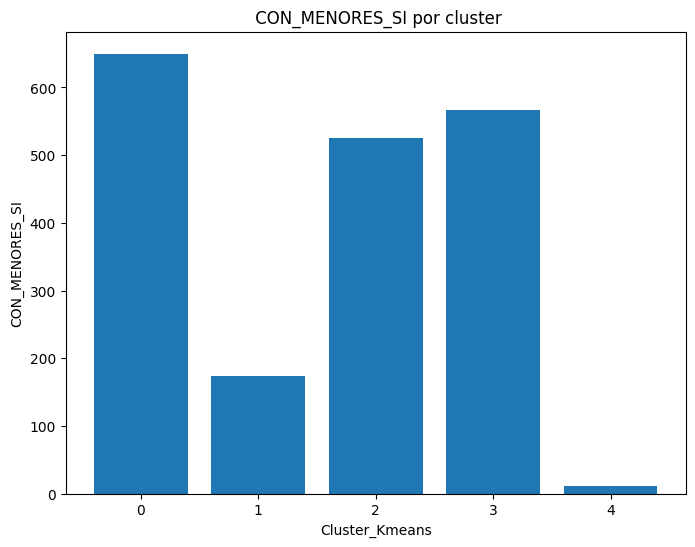

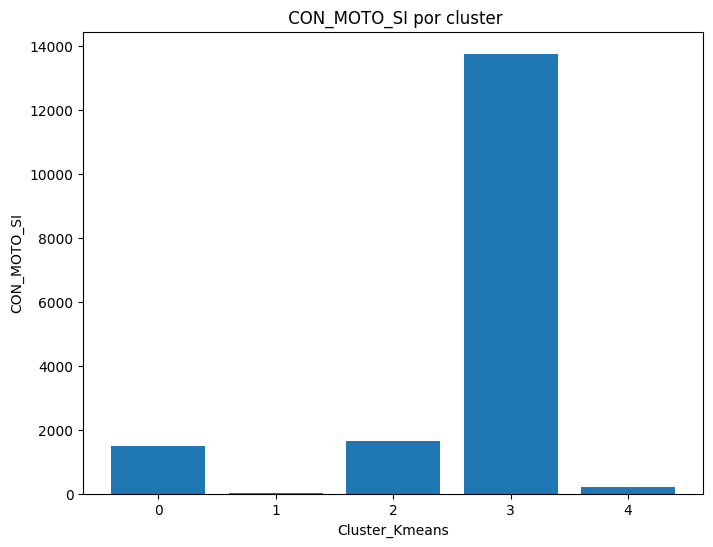

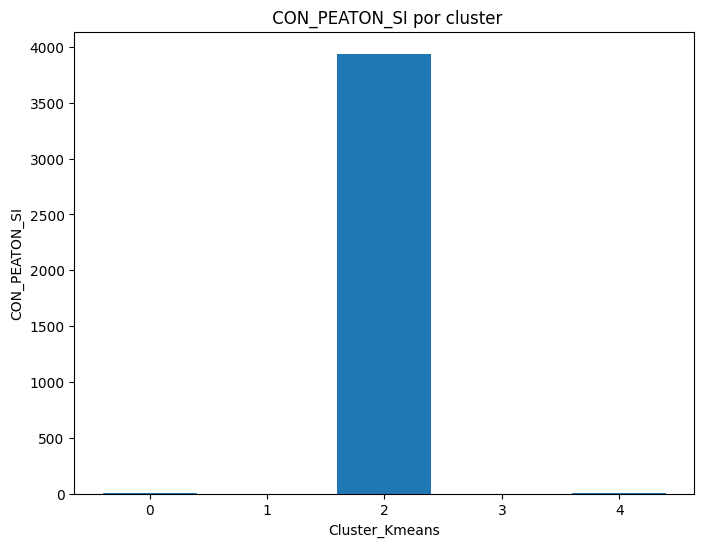

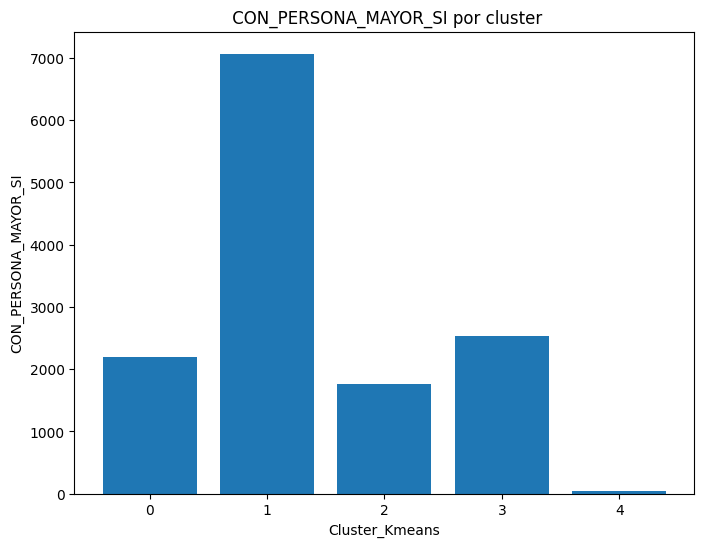

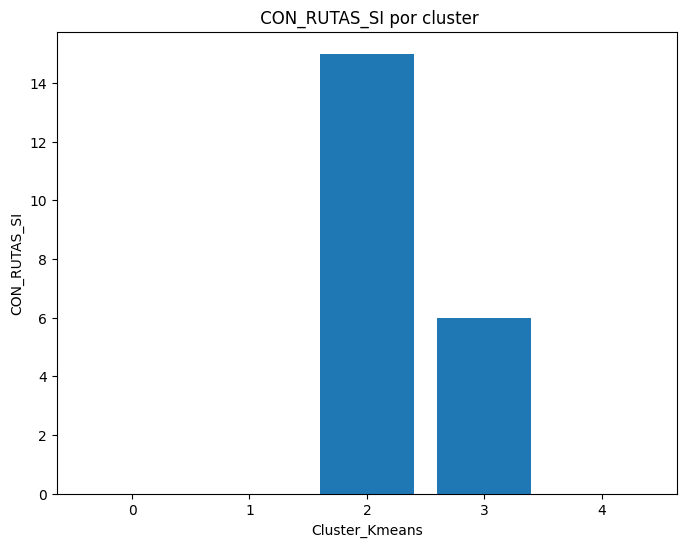

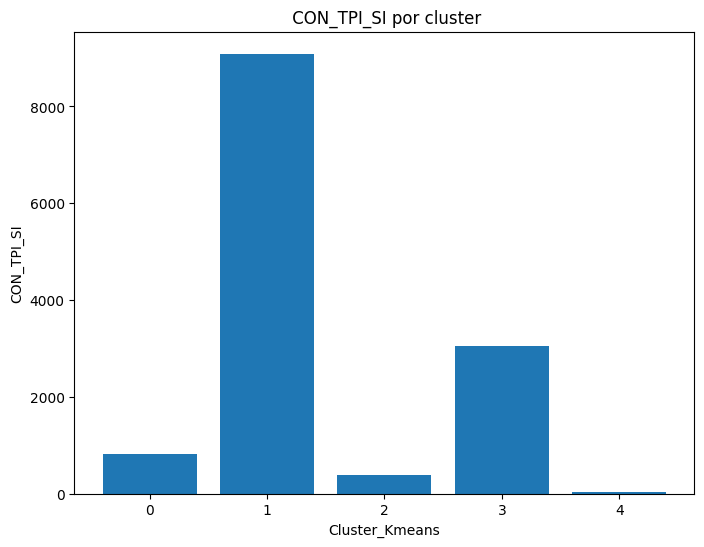

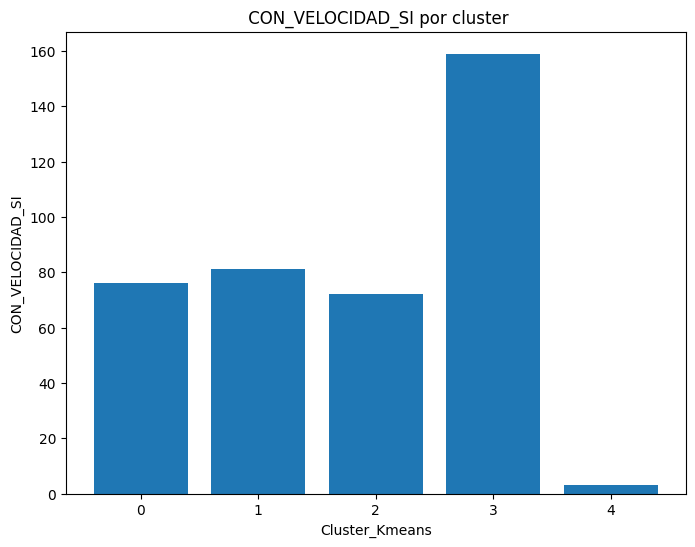

In [122]:
for columna in resultados.columns:
    plt.figure(figsize=(8, 6))  # Tamaño de la figura
    plt.bar(resultados.index, resultados[columna])  # Crea la gráfica de barras
    plt.xlabel('Cluster_Kmeans')  # Etiqueta del eje x
    plt.ylabel(columna)  # Etiqueta del eje y (nombre de la columna)
    plt.title(f' {columna} por cluster')  # Título de la gráfica
    plt.show()  # Muestra la gráfica


In [99]:
estadisticas_por_cluster=data.groupby('Cluster_Kmeans').describe(include='all').T
print(estadisticas_por_cluster.to_string())

Cluster_Kmeans                                 0             1            2             3           4
HuboFallaVehiculo             count  6215.000000  39241.000000  4080.000000  16281.000000  362.000000
                              mean      0.001609      0.003772     0.005147      0.003194    0.000000
                              std       0.040083      0.061298     0.071567      0.056426    0.000000
                              min       0.000000      0.000000     0.000000      0.000000    0.000000
                              25%       0.000000      0.000000     0.000000      0.000000    0.000000
                              50%       0.000000      0.000000     0.000000      0.000000    0.000000
                              75%       0.000000      0.000000     0.000000      0.000000    0.000000
                              max       1.000000      1.000000     1.000000      1.000000    0.000000
CumpleNormasSeguridad         count  6215.000000  39241.000000  4080.000000  16281

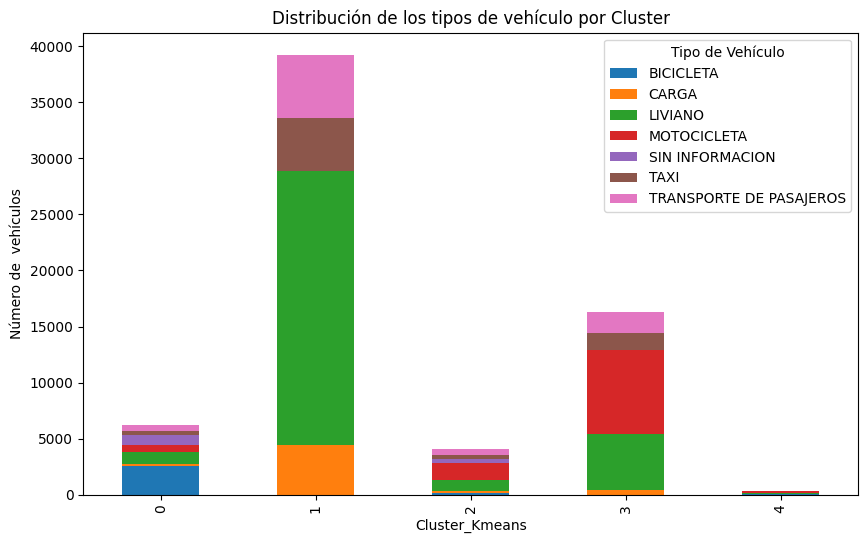

In [104]:
# Agrupa los datos por "Cluster_Kmeans" y "VehiculoViajabaClasificado" y cuenta las ocurrencias
data_grouped = CONDUCTORES_base.groupby(['Cluster_Kmeans', 'VehiculoViajabaClasificado']).size().unstack(fill_value=0)

# Crea una gráfica de barras apiladas
data_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configura etiquetas y título
plt.xlabel('Cluster_Kmeans')
plt.ylabel('Número de  vehículos')
plt.title('Distribución de los tipos de vehículo por Cluster')

# Muestra la leyenda
plt.legend(title='Tipo de Vehículo')

# Muestra la gráfica
plt.show()

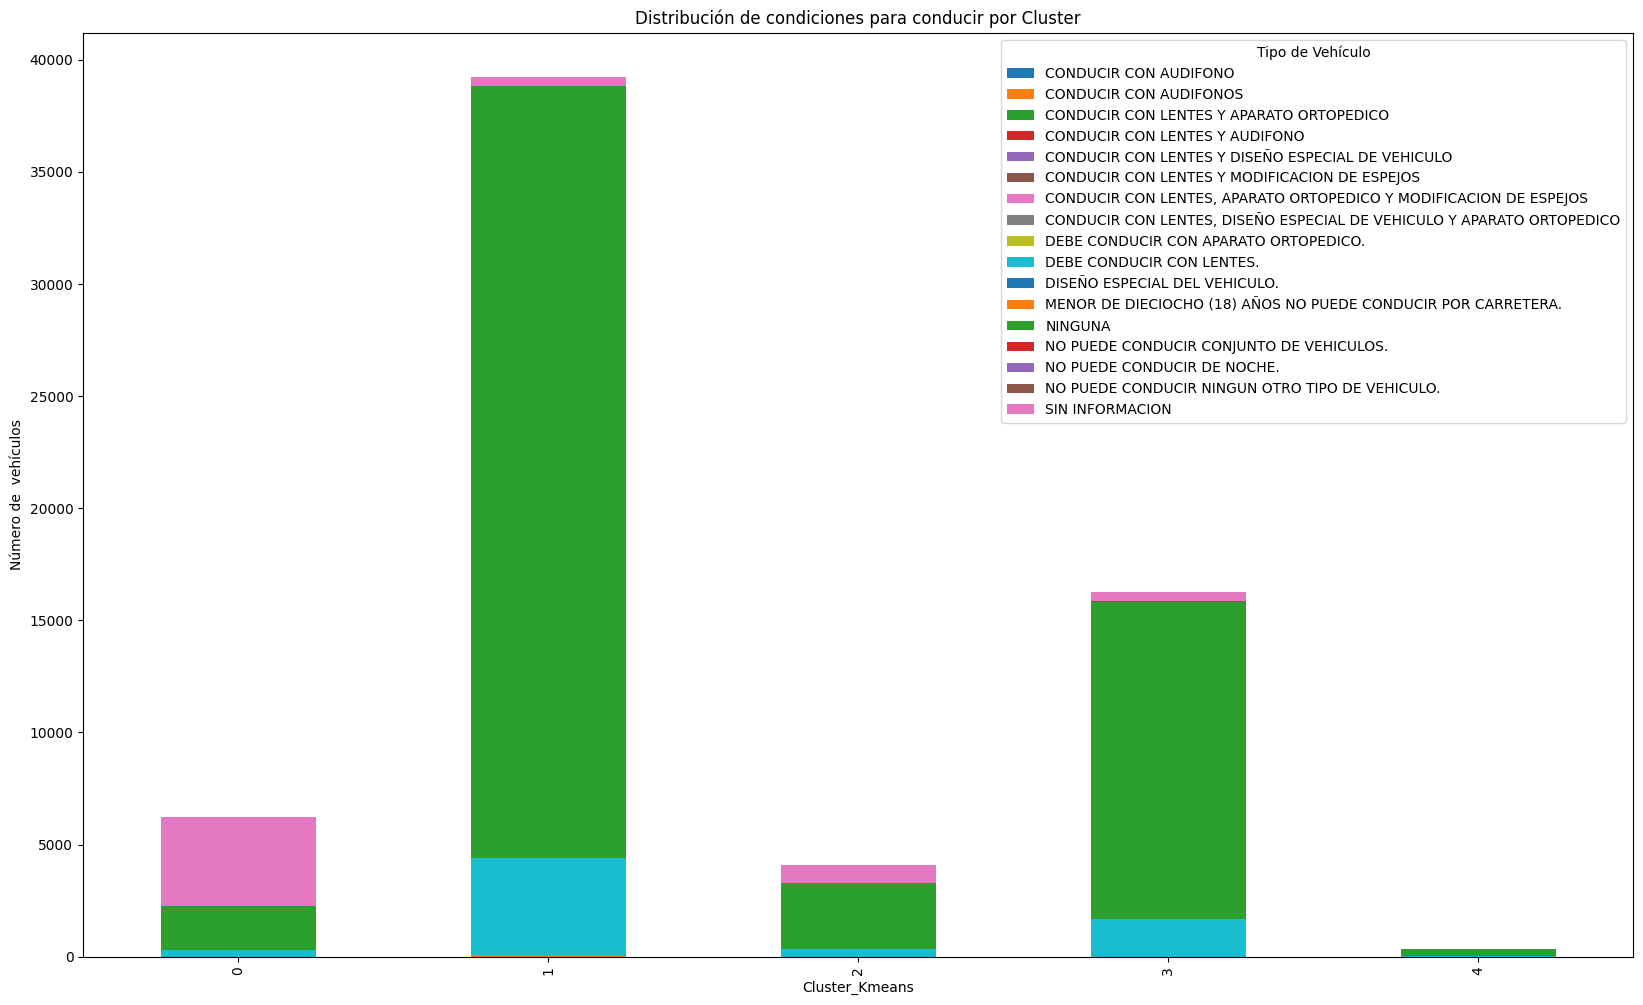

In [124]:

# Agrupa los datos por "Cluster_Kmeans" y "VehiculoViajabaClasificado" y cuenta las ocurrencias
data_grouped = CONDUCTORES_base.groupby(['Cluster_Kmeans', 'CodigoRestriccionLicencia']).size().unstack(fill_value=0)

# Crea una gráfica de barras apiladas
data_grouped.plot(kind='bar', stacked=True, figsize=(20, 12))

# Configura etiquetas y título
plt.xlabel('Cluster_Kmeans')
plt.ylabel('Número de  vehículos')
plt.title('Distribución de condiciones para conducir por Cluster')

# Muestra la leyenda
plt.legend(title='Tipo de Vehículo')

# Muestra la gráfica
plt.show()

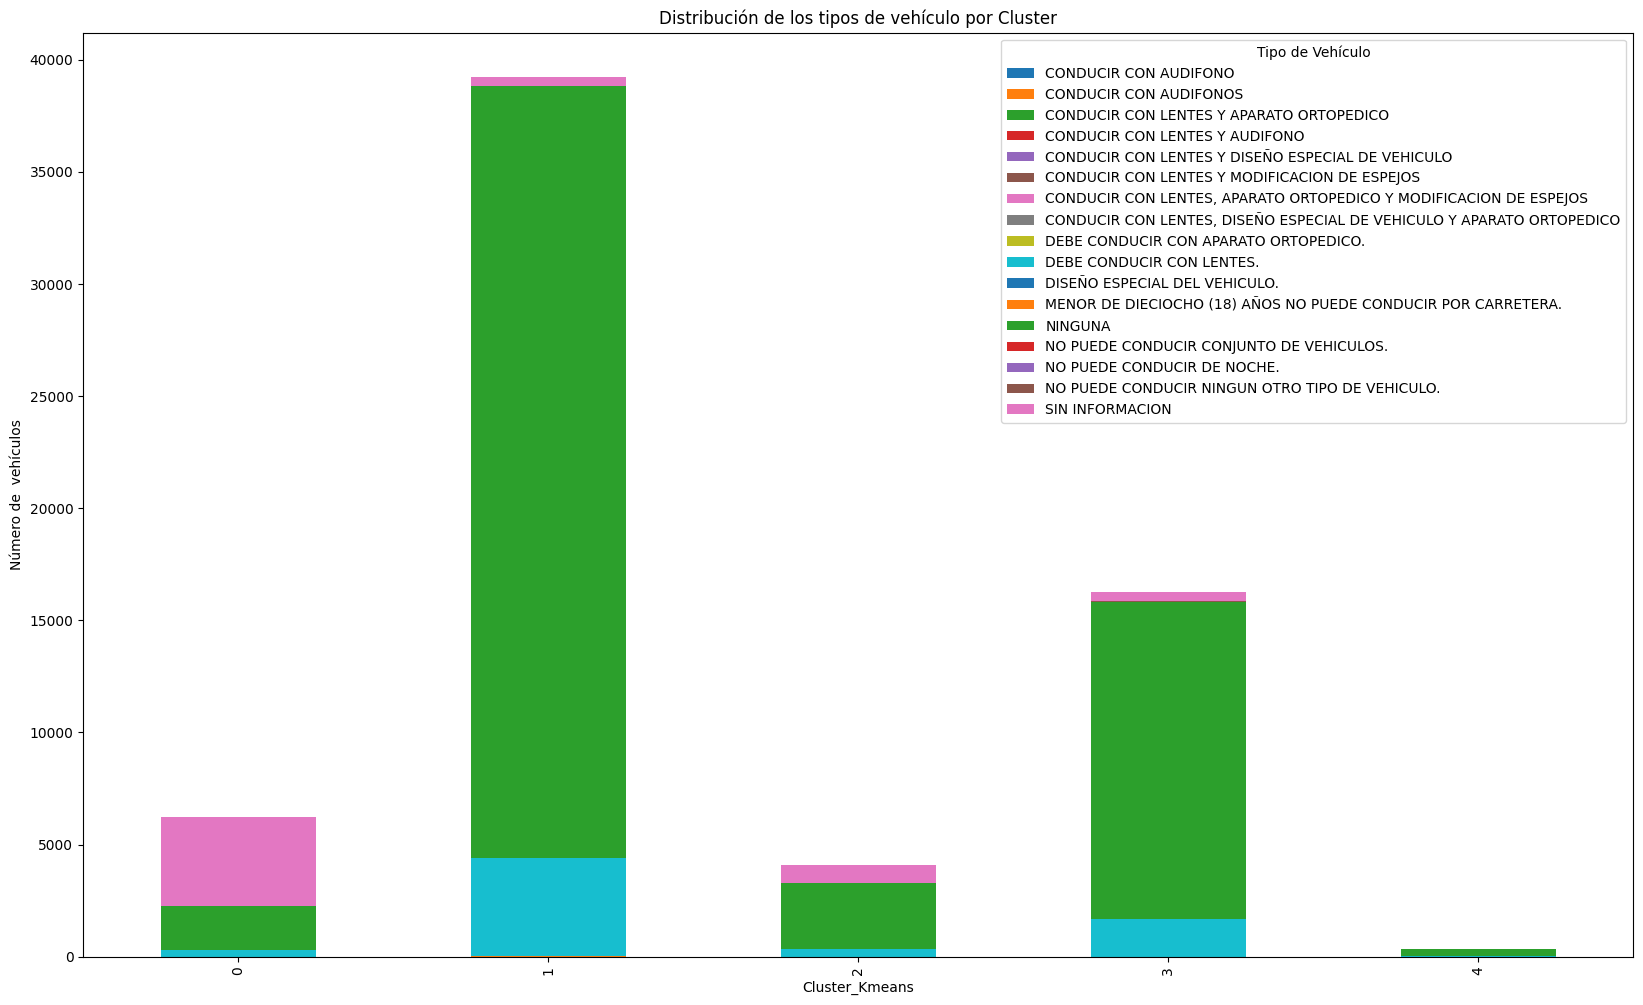

In [110]:
# Agrupa los datos por "Cluster_Kmeans" y "VehiculoViajabaClasificado" y cuenta las ocurrencias
data_grouped = CONDUCTORES_base.groupby(['Cluster_Kmeans', 'CodigoRestriccionLicencia']).size().unstack(fill_value=0)

# Crea una gráfica de barras apiladas
data_grouped.plot(kind='bar', stacked=True, figsize=(20, 12))

# Configura etiquetas y título
plt.xlabel('Cluster_Kmeans')
plt.ylabel('Número de  vehículos')
plt.title('Distribución de los tipos de vehículo por Cluster')

# Muestra la leyenda
plt.legend(title='Tipo de Vehículo')

# Muestra la gráfica
plt.show()

In [16]:
# !pip install scikit-learn-extra

In [18]:
# from sklearn_extra.cluster import KMedoids
# from scipy.spatial import distance_matrix


In [21]:
# df_reducido = pd.DataFrame(reduced_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,6.083791,-3.694461,-3.006980,3.690705,-0.942365,1.125699,-0.571998,-0.214077,0.528456,0.002458,-0.497969,0.239964,0.381750,-1.811008,0.701180,-0.529512
1,-0.075984,-0.503816,-0.170112,-0.185804,-0.964938,1.805316,-0.326657,0.471213,0.154535,0.472971,-0.876722,-0.857913,-0.533376,0.113268,-0.792865,0.239768
2,1.533004,-4.991910,-0.459914,2.580625,-1.775650,2.604109,-0.204129,-0.423850,0.872415,0.327847,-0.783407,-0.920909,1.241693,-0.653981,-1.010928,-0.075265
3,1.110077,-3.989260,1.392266,-1.001820,1.248317,-0.771958,-0.308707,0.394788,-0.688503,-0.393763,0.153954,-0.038220,-1.398850,0.489047,1.687119,0.468624
4,0.418018,-1.907887,1.046790,-1.402833,1.051958,-0.542261,-0.267123,0.496979,-0.722834,-0.156407,0.024785,-0.134367,-1.461755,0.542320,1.240070,0.607990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66174,-0.959760,0.402159,-0.139360,0.169854,0.210368,-0.262523,-0.096943,-0.199420,0.036931,-0.116034,0.032532,0.047867,0.423327,-0.371086,0.267487,0.772153
66175,-0.959760,0.402159,-0.139360,0.169854,0.210368,-0.262523,-0.096943,-0.199420,0.036931,-0.116034,0.032532,0.047867,0.423327,-0.371086,0.267487,0.772153
66176,-1.252829,0.608274,-0.309922,0.770950,1.851375,0.305070,0.514339,-0.225188,0.248961,-0.271044,0.030164,0.160103,-0.095434,0.272374,-0.090198,-0.957454
66177,-1.252829,0.608274,-0.309922,0.770950,1.851375,0.305070,0.514339,-0.225188,0.248961,-0.271044,0.030164,0.160103,-0.095434,0.272374,-0.090198,-0.957454


In [13]:
# from sklearn.metrics.pairwise import euclidean_distances

In [15]:
# df_reducido = pd.DataFrame(reduced_data)
# df_reducido

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.595724,-0.074076,-0.354101,1.158606,-0.389590,0.287857,0.064668,-0.420332,0.303542,0.125234,-0.010028,0.944669,-0.118708,0.178208,-0.417898,0.478826
1,-1.242915,0.591370,-0.336411,0.783455,1.820904,0.446193,0.424913,-0.238883,-0.101682,-0.461238,0.160929,-0.194220,-0.051656,0.284563,0.010614,-0.954273
2,6.969198,0.540061,-5.865264,-2.986307,0.253107,1.842163,6.918269,0.776527,0.707660,3.152050,-1.914143,0.339133,-5.389955,5.574348,-1.405417,3.099451
3,-0.952839,0.386066,-0.173437,0.182227,0.195569,-0.236558,-0.049055,-0.258598,-0.045959,-0.072439,0.073668,0.453458,-0.107495,-0.319923,0.205936,0.779151
4,0.450681,-1.865678,1.175148,-1.320451,1.081378,-0.648554,-0.114811,0.587740,-0.881171,0.452500,-0.083460,-1.302943,0.186513,0.355454,1.075282,0.770659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33084,-0.952839,0.386066,-0.173437,0.182227,0.195569,-0.236558,-0.049055,-0.258598,-0.045959,-0.072439,0.073668,0.453458,-0.107495,-0.319923,0.205936,0.779151
33085,2.878672,-6.722266,1.203621,1.158311,-0.714631,1.548674,-0.549458,-0.694597,0.371510,0.111820,-0.618633,1.144973,0.413244,0.353370,-0.105935,-0.620945
33086,-0.952839,0.386066,-0.173437,0.182227,0.195569,-0.236558,-0.049055,-0.258598,-0.045959,-0.072439,0.073668,0.453458,-0.107495,-0.319923,0.205936,0.779151
33087,-1.242915,0.591370,-0.336411,0.783455,1.820904,0.446193,0.424913,-0.238883,-0.101682,-0.461238,0.160929,-0.194220,-0.051656,0.284563,0.010614,-0.954273


In [16]:
# matriz_distancia = euclidean_distances(df_reducido, df_reducido)

In [ ]:
# dist = distance_matrix(reduced_data, reduced_data, p = 2)
# dist

In [23]:
# from sklearn_extra.cluster import KMedoids

In [ ]:
# from sklearn_extra.cluster import KMedoids
# df_reducido = pd.DataFrame(reduced_data)
# matriz_distancia = euclidean_distances(df_reducido, df_reducido)
# modelo = KMedoids(n_clusters=5, random_state=42, metric='precomputed')

# # Ajusta el modelo a la matriz de distancias personalizada
# modelo.fit(matriz_distancia)

# # Entrenar el modelo
# KMedoids.fit(matriz_distancia)

# # Agregar las etiquetas asignadas por KMeans al DataFrame
# data["Cluster_kmedoids"] = KMedoids.labels_

# # Mostrar el DataFrame con las etiquetas de los clusters
# data.head()

In [ ]:
# Kmedoides =
# Kmedoides.medoid_indices_